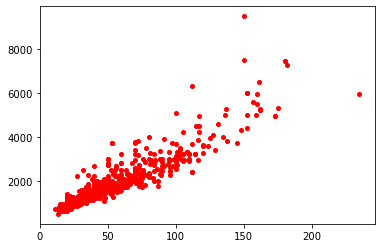

In [2]:
# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# On charge le dataset
house_data = pd.read_csv('house.csv')
house_data = house_data[house_data['loyer'] < 10000]

# On affiche le nuage de points dont on dispose
plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)
plt.show()

In [4]:
# On décompose le dataset et on le transforme en matrices pour pouvoir effectuer notre calcul
X = np.matrix([np.ones(house_data.shape[0]), house_data['surface'].values]).T
y = np.matrix(house_data['loyer']).T

# On effectue le calcul exact du paramètre theta
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta)

[[266.45460292]
 [ 30.66119596]]


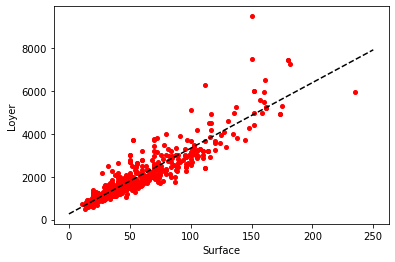

In [5]:
plt.xlabel('Surface')
plt.ylabel('Loyer')

plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)

# On affiche la droite entre 0 et 250
plt.plot([0,250], [theta.item(0),theta.item(0) + 250 * theta.item(1)], linestyle='--', c='#000000')

plt.show()

In [6]:
# estimation pour une surface de 35 mètres carrés
theta.item(0) + theta.item(1) * 35

1339.5964615602245

C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\hp\.conda\envs\AI\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


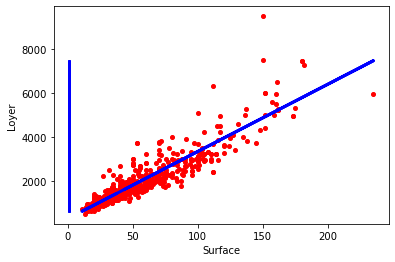

In [8]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)
Y_pred = regr.predict(house_data)

plt.xlabel('Surface')
plt.ylabel('Loyer')

plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)
plt.plot(X, Y_pred, color='blue', linewidth=3)
plt.show()